<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg 
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [2]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
raw['date'] = pd.to_datetime(raw['date'])
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
raw = raw.drop(['id', 'date', 'zipcode'], axis = 1)
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [5]:
raw = raw.assign(yr_built = 2022 - raw.yr_built,
           yr_renovated = lambda x : np.where(x.yr_renovated != 0, 2022 - raw.yr_renovated, 0))
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,0,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,0,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,0,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,0,47.6168,-122.045,1800,7503


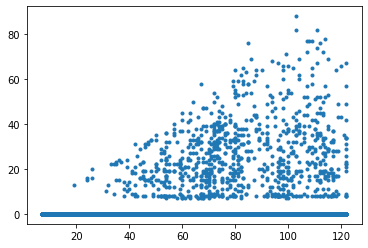

In [6]:
plt.plot(raw['yr_built'], raw['yr_renovated'], '.')

In [7]:
raw['renovate_type'] = np.select([(raw.yr_renovated == 0) & (raw.yr_built  > 40), 
                                  (raw.yr_renovated == 0) & (raw.yr_built  <= 40),
                                  (raw.yr_renovated != 0) & (raw.yr_built < 40),
                                  (raw.yr_renovated <= 20) & (raw.yr_built > 40), 
                                  (raw.yr_renovated > 20 & (raw.yr_built > 40))          
           ], ['no-old', 'no-old', 'no-new', 're-old', 'old-old'], default = 'new')
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovate_type
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,0,47.5112,-122.257,1340,5650,no-old
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639,old-old
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,0,47.7379,-122.233,2720,8062,no-old
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,0,47.5208,-122.393,1360,5000,no-old
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,0,47.6168,-122.045,1800,7503,no-old


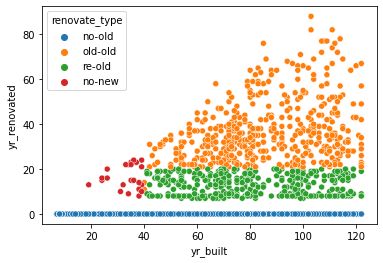

In [8]:
sns.scatterplot(data = raw, x = 'yr_built', y = 'yr_renovated', hue = 'renovate_type')

In [9]:
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovate_type
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,0,47.5112,-122.257,1340,5650,no-old
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639,old-old
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,0,47.7379,-122.233,2720,8062,no-old
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,0,47.5208,-122.393,1360,5000,no-old
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,0,47.6168,-122.045,1800,7503,no-old


In [9]:
x = raw[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovate_type']]
y = raw['price']

In [10]:
x = pd.get_dummies(x, columns = ['bedrooms', 'bathrooms', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'renovate_type'])

In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [12]:
del raw

In [ ]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

In [ ]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_tr)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

NameError: ignored

* 계속 비정상 종료가 떠서 마무리함